# Ford GoBike Data Exploration 
## by (Amgad Mohamed Abdelghfar)

## Preliminary Wrangling

> This project explores a dataset containing the trip of the ford GoBike data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
# Loading DataSet
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print("DataFrame shape = {}".format(df.shape))
print(df.info())
print("number of duplicates = {}".format(sum(df.duplicated())))

DataFrame shape = (183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175

In [4]:
# changing datatype for start-time and end-time 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [5]:
# changing datatype for member birth year 
df.member_birth_year=df.member_birth_year.fillna(df.member_birth_year.mean())
df.member_birth_year=df.member_birth_year.astype('int64')

In [6]:
# changing datatype for bike share for all trip
df.bike_share_for_all_trip= df.bike_share_for_all_trip.astype('bool')

In [7]:
# calculate the age for the members
df.gg=[]
current_year=datetime.date.today().year
for i in df.member_birth_year:
    P = current_year - i
    df.gg.append(P)
    
df['age']=df.gg  

<ipython-input-7-125eec123204>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.gg=[]


In [8]:
# changing trip duration from seconds to minutes
df['duration_min'] = df['duration_sec'] / 60

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,duration_min
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.770097,36.229903,12.101307
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,9.887534,9.887534,29.906496
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,20.000000,1.016667
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1981.000000,29.000000,5.416667
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,34.000000,8.566667
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,40.000000,13.266667
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,143.000000,1424.066667


In [10]:
# removing age outlier 
df.drop(df['age'].max(),inplace=True)

### What is the structure of your dataset?

> There are 183,412 rows for ford GoBike in the dataset with 16 column  Most variables are  numerical and there others are 2 datetime and 4 object type and 1 bool type

### What is/are the main feature(s) of interest in your dataset?

> my main features of interest is figuring out how lont trip duration it takes dependent on other features such as: gender, age, start station, end station, and user type from the dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  trip duration will have my concern keeping in mind the start-stations and end-stations. and the other features may effect on it such as: user_type, age, and gender 

## Univariate Exploration

> let's now look at the distribution of the main variable of interest Trip Duration

In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,True,37,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984,NaN,True,37,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,True,49,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,True,32,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True,47,26.416667


In [12]:
# making function for plots labels
def labels_3(x,y,z):
    plt.title(x)
    plt.xlabel(y)
    plt.ylabel(z)

In [13]:
# changing trip duration from seconds to minutes
df['duration_min'] = df['duration_sec'] / 60

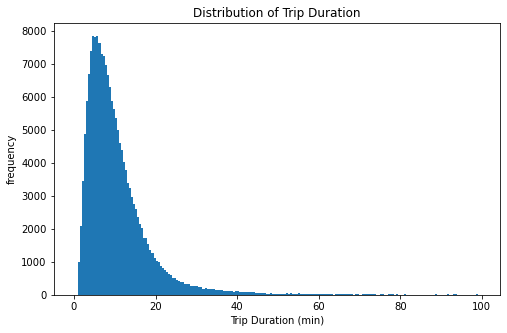

In [14]:
binsize = 0.5
bins = np.arange(0, 100, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
labels_3('Distribution of Trip Duration','Trip Duration (min)','frequency')
plt.show();

The distribution is right-skewed and shows most trips at 10 min now lets try it on log scale on the x-axis

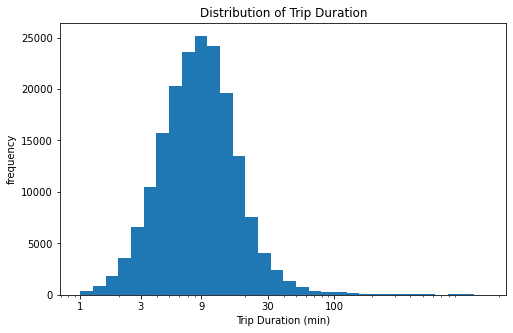

In [15]:
# plotting trip duration on log scale on the x-axis
logbin = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+logbin, logbin)
tick =  [ 1 , 3 , 9, 30, 100]
label = ['{}'.format(i) for i in tick]

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(tick, label)
labels_3('Distribution of Trip Duration','Trip Duration (min)','frequency')
plt.show();

trip duration has a long tailed distribution with a lot of trips on low duration end, and few on high duration end. and When plotted on a log-scale, the distribution looks unimodal, with one peak around 10 minutes

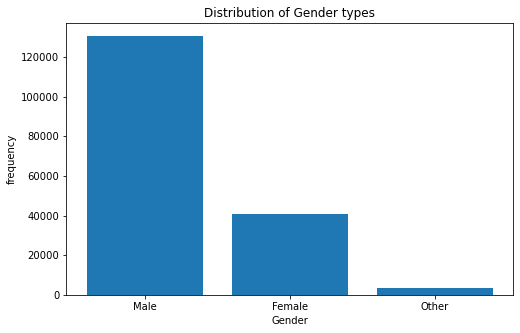

In [16]:
# plotting genders type 
plt.figure(figsize=[8,5])
labels=df.member_gender.value_counts().keys()
high=df.member_gender.value_counts()
plt.bar(x =labels , height = high)
labels_3('Distribution of Gender types','Gender','frequency')
plt.show()

this shows that male has the highest users of bike than females

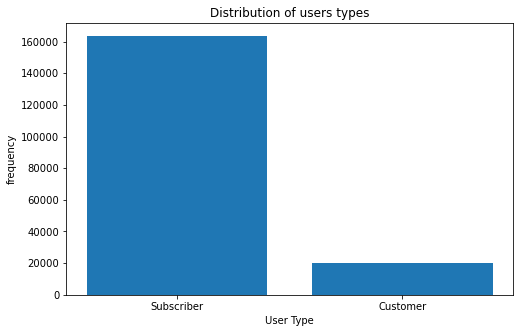

In [17]:
# plotting distribution of users type
plt.figure(figsize=[8,5])
x_label=df.user_type.value_counts().keys()
y_label=df.user_type.value_counts()
plt.bar(x = x_label , height = y_label  )
labels_3('Distribution of users types','User Type','frequency')
plt.show()

most of the users in 2019 were Subscriber while the rest were Customer.

And the last variable is age of the users.

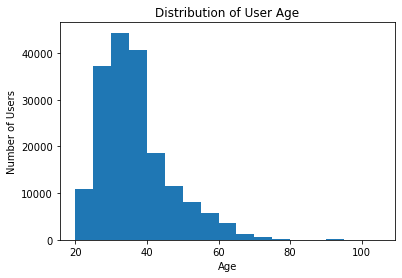

In [18]:
# Plotting age distribution derived from member's birth year.
plt.hist(data=df,x='age',bins=np.arange(20,110,5));
plt.title("Distribution of User Age");
labels_3("Distribution of User Age","Age","Number of Users")

the distribution is more concentrated between 20 to 40 years old

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Trip Duration takes a large amount of values and takes a shape right-skewed concentrated to a tail so after plotting it in log transform , it shows that peak occurs at 600 seconds starting from 0 then distribution starts to dip and doesnot regain any more peak value

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the Birth date, Birth year is converted by substracting the current year from the year in the dataset in order to give the distribution for age . And i converted the duration variable from seconds to minutes because seconds are just too large to measure a trip duration.

## Bivariate Exploration

>  first, let's have a look at the correlation between trip duration and age

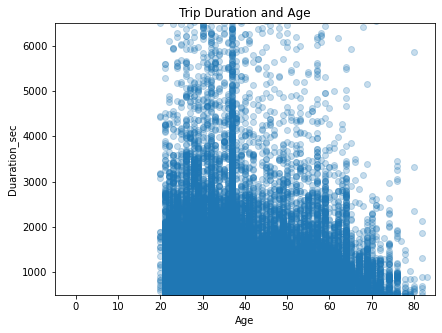

In [19]:
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1);
plt.scatter((df.age), df['duration_sec'], alpha = 0.25 );
plt.axis([-5, 85, 500, 6500]);
labels_3('Trip Duration and Age','Age','Duaration_sec')

most of the durations are below 5000 and age is below 80 and the more the age the less duration the trip takes

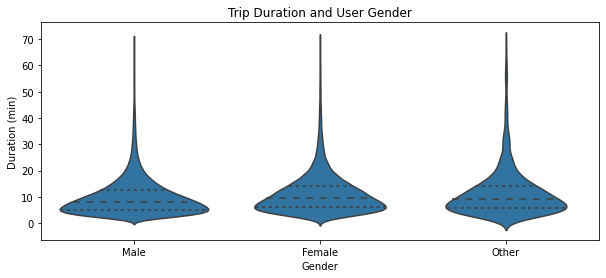

In [20]:
plt.figure(figsize=[10,4])
df2 = df.query("duration_min < 70")
base_color = sb.color_palette()[0]
sb.violinplot(data=df2, x='member_gender', y='duration_min', color=base_color, inner='quartile')
labels_3('Trip Duration and User Gender','Gender','Duration (min)')

the trip duration does not seem to be affected by user gender. The violin plot looks similar for the 3 gender categories, with the median all similar around 10 minutes.

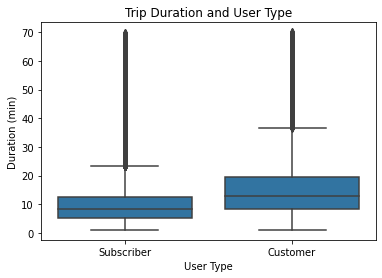

In [21]:
base_color = sb.color_palette()[0]
df3 = df.query("duration_min < 70")
sb.boxplot(data=df3, x='user_type', y='duration_min', color=base_color)
labels_3('Trip Duration and User Type','User Type','Duration (min)')

the higher percentage of customer rides longer trips duration then subscriber. beside, number of subscriber riders are very high then customer.

In [22]:
# checking the trip duration over each Day
df['start_days'] = pd.DatetimeIndex(df['start_time']).day
df['start_days'].value_counts()

28    9828
20    9667
21    9536
19    9467
7     9234
22    9204
6     9057
11    8681
5     8486
12    8473
27    7715
15    7288
25    7033
14    6598
8     6356
1     6133
18    5647
4     5491
23    5451
26    5387
24    4497
17    4225
16    3993
10    3960
2     3231
13    3202
3     2841
9     2730
Name: start_days, dtype: int64

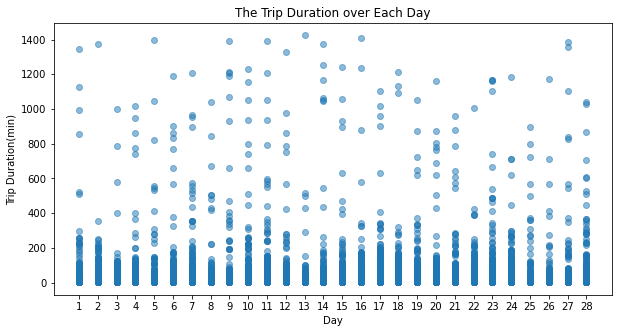

In [23]:
df['start_days'] = df['start_days'].astype(int)
plt.figure(figsize = [10,5])
plt.scatter(data = df, x = 'start_days' , y = 'duration_min' , alpha = 0.5)
tick_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
plt.xticks(tick_labels, tick_labels)
labels_3('The Trip Duration over Each Day','Day','Trip Duration(min)')

From days vs duration on scatter plot, week-ends has the most duration while rest of days varies

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Duration had a low amount of correlation with days. There is no big difference between the duration in each day. This might be caused by workdays and  vacation and week-ends. 
For Gender, the trip duration does not seem to be different between male, female and other. For user type, Customer has more trip duration than Subscriber

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is not interesting relationship between other features The relationship between User Age and the other categorical variables do not have any significant difference but the percentage of female users take longer trips is higher

## Multivariate Exploration

> let's investigate on the relationship between trip duration and age and gender of the users.
Age under 60 takes most of the users. So, it makes things easier to remove users more than 60 years old. 

In [24]:
df5 = df[df['age']<=60]
df5['age_bins'] = df5['age'].apply(lambda y: '10 - 20' if 10<y<=20
                                                  else '20 - 30' if 20<y<=30
                                                  else '30 - 40' if 30<y<=40
                                                  else '40 - 50' if 40<y<=50
                                                  else '50 - 60' if 50<y<=60
                                                  else y)

<ipython-input-24-b73ec3d9304e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['age_bins'] = df5['age'].apply(lambda y: '10 - 20' if 10<y<=20


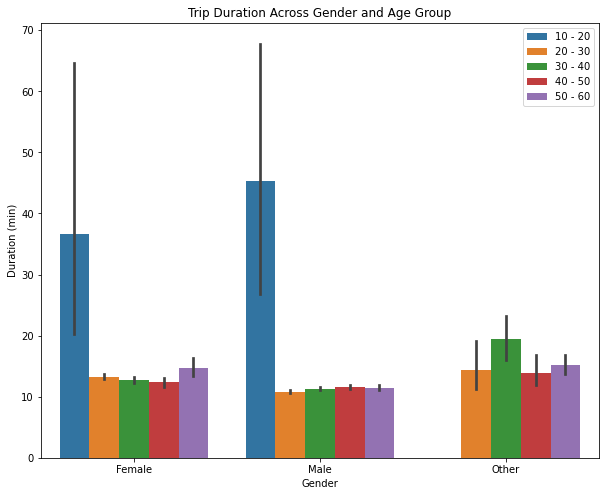

In [25]:
plt.figure(figsize = [10, 8])

ex = sb.barplot(x='member_gender', y = 'duration_min', hue='age_bins', data=df5.sort_values(by= 'age_bins'))
labels_3('Trip Duration Across Gender and Age Group','Gender','Duration (min)')
leg = ex.legend()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In two gender types (male,female), the age range 10-20 has the longest trip duration, and in other type 30-40 has the longest trip duration between male and female. And in the rest age ranges all gender type are close with each other 

### Were there any interesting or surprising interactions between features?

> My surprise was that the second longest trip duration in male and female was the range 50-60 . so i think this age range was highh because they old and get out a lot and takes much time on the trip due to thheir body condition

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!